In [1]:
#!pip install opencv-python 
#!pip install face_recognition

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.2/38.6 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.5/38.6 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.6/38.6 MB 4.0 MB/s eta 0:00:10
    --------------------------------------- 0.8/38.6 MB 3.8 MB/s eta 0:00:11
   - -------------------------------------- 1.3/38.6 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.6 MB 4.7 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 5.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.6 MB 5.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.7/38.6 MB 5.7 MB/s eta 0:00:07
   --- ------------------------------------ 2.9/38.6 MB 6.0 MB/s eta 0:00:06
   --- ------------------------------------ 3.5/38.6 MB 6.3 MB/s eta 0:00:06
   ---

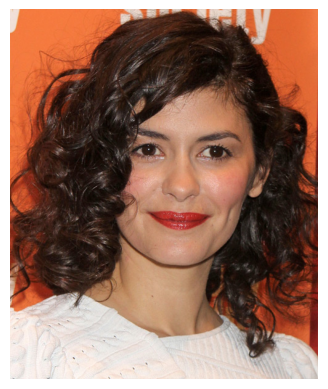

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Read the image using Pillow
image_path = 'C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/0.jpg'
image = Image.open(image_path)

# Step 2: Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: This removes the axis around the image
plt.show()


x: 43 y: 29


"\ncv2.imshow('image', img)\ncv2.imshow('cropped_image', cropped_image)\nkey = cv2.waitKey(0)\nif key:\n    cv2.destroyAllWindows()\n"

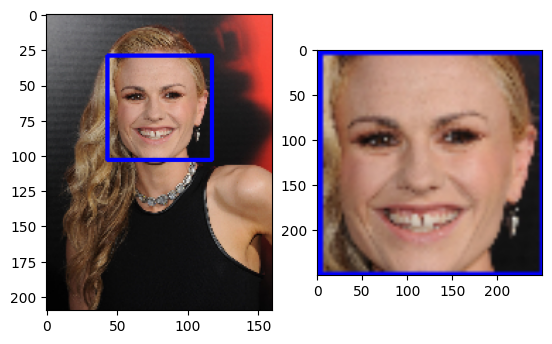

In [5]:
import cv2
import matplotlib.pyplot as plt
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
image_path = 'C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/2.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Draw rectangle around the faces
for index, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cropped_image = img[y:y+h, x:x+w]
    
    crop_width = max(w,h)
    #img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    cropped_image = cv2.resize(cropped_image, (250, 250))
    print("x:", x, "y:", y)

plt.subplot(1, 2, 1)
imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.subplot(1, 2, 2)
cropped_imageRGB = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_imageRGB)
'''
cv2.imshow('image', img)
cv2.imshow('cropped_image', cropped_image)
key = cv2.waitKey(0)
if key:
    cv2.destroyAllWindows()
'''


(128,)
[-0.15902384  0.04591525  0.14587121 -0.09631548 -0.10042652]


'\ncv2.imshow("TestImg", image)\nkey = cv2.waitKey(0)\nif key:\n    cv2.destroyAllWindows()\n'

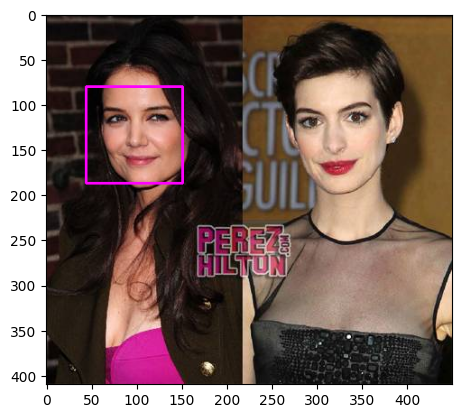

In [14]:
import matplotlib.pyplot as plt
import cv2
import face_recognition
image_path = 'C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/79.jpg'

image = face_recognition.load_image_file(image_path)
MaxLeg = max(image.shape)
image = cv2.resize(image, (0,0), None, min(1,1000/MaxLeg), min(1,1000/MaxLeg))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(image)[0]  # get the first face
encode = face_recognition.face_encodings(image)[0]  # get the first face
cv2.rectangle(image, (faceLoc[3],faceLoc[0]), (faceLoc[1],faceLoc[2]), (255,0,255), 2)

print(encode.shape)
print(encode[:5])

imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)

'''
cv2.imshow("TestImg", image)
key = cv2.waitKey(0)
if key:
    cv2.destroyAllWindows()
'''


In [68]:
!pip install cmake
!pip install dlib
!pip install face_recognition
!pip install pandas

In [16]:
import matplotlib.pyplot as plt
import cv2
import face_recognition
import os
import json
import numpy as np

In [17]:
# Encoding all the 6955 images in small train

path = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/data/train_smallsmall"
dirList = os.listdir(path)
dirList = sorted(dirList, key=lambda x: int(x.split('.')[0]))
encodeList = []
NumList = []
skip = 0
print(dirList[:5])


for cl in dirList:
    curImg = face_recognition.load_image_file(f'{path}/{cl}')
    curName = int((os.path.splitext(cl)[0]))
    if curName%10 == 0:
        print("NowPic:", curName/len(dirList)*100, "%...skip:", skip)

    MaxLeg = max(curImg.shape)
    curImg = cv2.resize(curImg, (0,0), None, min(1,1000/MaxLeg), min(1,1000/MaxLeg))
    curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    faceLocTemp = face_recognition.face_locations(curImg)

    if len(faceLocTemp) == 1:
        faceLoc = faceLocTemp[0]
        encode = (face_recognition.face_encodings(curImg)[0] + 1)/2  # scaled to 0~1
        #encode = face_recognition.face_encodings(curImg)[0]
        #encodeList.append(encode.tolist())
        #NumList.append(curName)
        save_data = {
            'encodeList': encode.tolist(),
            'NumList': curName,
        }   
        if curName == 0:
            with open('FaceEncodeDataTry.json', 'w') as file:
                json.dump(save_data, file)
        else:
            with open('FaceEncodeDataTry.json', 'a') as file:
                file.write('\n' + json.dumps(save_data))
    else:
        skip += 1
        

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']
NowPic: 0.0 %...skip: 0
NowPic: 45.45454545454545 %...skip: 0
NowPic: 90.9090909090909 %...skip: 3


'\ncurImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)\nplt.imshow(curImg)\n'

In [35]:
with open('FaceEncodeDataTry.json', 'r') as file:
    read_data = [json.loads(line) for line in file]
encodeList = [item['encodeList'] for item in read_data]
encodeList = np.array(encodeList)
NumList = [item['NumList'] for item in read_data]
NumList = np.array(NumList)
print(encodeList)
print(NumList)
print("")
print("skip:", skip)
print(encodeList.shape)
print(NumList.shape)
print("total:", len(NumList)+skip)

[[0.41565857 0.51842019 0.50576789 ... 0.5091427  0.52399945 0.51273948]
 [0.46318827 0.52812508 0.55745094 ... 0.42046847 0.53846342 0.51853062]
 [0.48156509 0.53717205 0.52165322 ... 0.54456671 0.52245807 0.55258685]
 ...
 [0.44770521 0.50593454 0.54812232 ... 0.45848892 0.49781024 0.53252798]
 [0.4439995  0.56561886 0.55351485 ... 0.45315826 0.49856831 0.53430593]
 [0.49980237 0.49678357 0.52514268 ... 0.48592321 0.50943152 0.53156952]]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 17 19 20]

skip: 3
(18, 128)
(18,)


In [36]:
# Read true_data from the CSV file

import pandas as pd
CSVpath = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/data/train_smallsmall.csv"
CSV = pd.read_csv(CSVpath)
CSV_NumList = CSV.iloc[:, 0].tolist()  # Convert column 1 to a list
CSV_NameList = CSV.iloc[:, 2].tolist()  # Convert column 3 to a list
print("CSV_NumList", CSV_NumList)
print("CSV_NameList", CSV_NameList)

CSV_NumList [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
CSV_NameList ['Audrey Tautou', 'Adam Sandler', 'Anna Paquin', 'Ava Gardner', 'Amy Adams', 'Angelina Jolie', 'Bill Paxton', 'Alan Alda', 'Abigail Breslin', 'Alicia Vikander', 'Albert Finney', 'Aaron Judge', 'Beyonce Knowles', 'Beyonce Knowles', 'Andrew Lincoln', 'Armin Mueller-Stahl', 'Andy Murray', 'Amy Ryan', 'Alan Arkin', 'Adrien Brody', 'Analeigh Tipton']


In [37]:
# Extract true data from CSV_NameList

extra_trueName = []
for Num in NumList:
    if Num == CSV_NumList[Num]:
        extra_trueName.append(CSV_NameList[Num]) 
    else:
        print("ERROR file name")

print(extra_trueName[:5])
print(len(NumList), len(extra_trueName))

['Audrey Tautou', 'Adam Sandler', 'Anna Paquin', 'Ava Gardner', 'Amy Adams']
18 18


In [38]:
# Preparing model training

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

extra_trueName = np.array(extra_trueName)
_, idx = np.unique(extra_trueName, return_index=True)
num_classes = len(idx)

sorted_idx = np.sort(idx)
unique_trueName = extra_trueName[sorted_idx]

print(extra_trueName)
print("")
print(unique_trueName)
print(num_classes)

y_train = [[0 for _ in range(len(unique_trueName))] for _ in range(len(extra_trueName))]

# Now fill y_train based on the condition
for ans_index, ans_name in enumerate(extra_trueName):
    for cat_index, cat_name in enumerate(unique_trueName):
        if cat_name == ans_name:
            y_train[ans_index][cat_index] = 1

y_train = np.array(y_train)
print("")
print(y_train[11])
print(unique_trueName[np.argmax(y_train[11])])
print(y_train.shape)

input_shape = (128, 1)

encodeList = np.array(encodeList)
x_train = np.expand_dims(encodeList, -1)
print("x_train", x_train.shape)



['Audrey Tautou' 'Adam Sandler' 'Anna Paquin' 'Ava Gardner' 'Amy Adams'
 'Angelina Jolie' 'Bill Paxton' 'Alan Alda' 'Abigail Breslin'
 'Alicia Vikander' 'Albert Finney' 'Beyonce Knowles' 'Beyonce Knowles'
 'Andrew Lincoln' 'Armin Mueller-Stahl' 'Amy Ryan' 'Adrien Brody'
 'Analeigh Tipton']

['Audrey Tautou' 'Adam Sandler' 'Anna Paquin' 'Ava Gardner' 'Amy Adams'
 'Angelina Jolie' 'Bill Paxton' 'Alan Alda' 'Abigail Breslin'
 'Alicia Vikander' 'Albert Finney' 'Beyonce Knowles' 'Andrew Lincoln'
 'Armin Mueller-Stahl' 'Amy Ryan' 'Adrien Brody' 'Analeigh Tipton']
17

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Beyonce Knowles
(18, 17)
x_train (18, 128, 1)


In [43]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv1D(32, kernel_size=2, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=2, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=2, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 127, 32)           96        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 63, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 62, 64)            4160      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 31, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 30, 128)           16512     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 15, 128)         

In [47]:
batch_size = 1  #128
epochs = 100   #15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, validation_split=0)
model_path = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/my_modelTry.h5"
model.save(model_path)

Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 2.8392 - accuracy: 0.1111
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8149 - accuracy: 0.1111
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8157 - accuracy: 0.1111
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8090 - accuracy: 0.1111
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8016 - accuracy: 0.1111
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 2.8115 - accuracy: 0.1111
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8028 - accuracy: 0.1111
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 2.8009 - accuracy: 0.1111
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 2.7978 - accuracy: 0.1111
Epoch 10/100
18/18 [==============================] - 0s 9ms/step - loss: 2.7864 - accuracy: 0.1111
Epoch 11

In [48]:
model.load_weights('my_modelTry.h5')

(1, 128, 1)
1/1 [==============================] - 0s 29ms/step
[[2.7122151e-04 5.0226154e-06 2.1054362e-05 1.4693165e-04 4.1969004e-04
  2.2517756e-04 8.1499325e-05 9.0501283e-04 6.3268229e-04 2.5580539e-03
  4.9749203e-04 2.7603967e-04 4.8326834e-05 6.0375974e-06 7.0505735e-04
  9.9310803e-01 9.2757567e-05]]
15
Adrien Brody
Adrien Brody


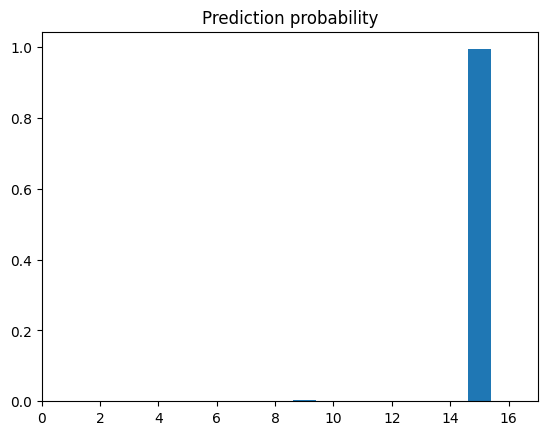

In [60]:
idx = 16
print(x_train[idx:idx+1].shape)
yhat = model.predict(x_train[idx:(idx+1)])
print(yhat)
plt.bar(np.arange(num_classes),yhat[0])
plt.xlim([0,num_classes])
plt.title('Prediction probability')
print(np.argmax(yhat))
print(unique_trueName[np.argmax(y_train[idx])])
print(unique_trueName[np.argmax(yhat)])

In [53]:
import csv

# Data to be written to the CSV file
data = [
    {"Id": 0, "Category": "Books"},
    {"Id": 1, "Category": "Electronics"},
    {"Id": 2, "Category": "Home & Kitchen"},
    {"Id": 3, "Category": "Garden"},
    {"Id": 4, "Category": "Toys & Games"}
]

# Specify the column headers/order
fieldnames = ['Id', 'Category']

# Open the file in write mode
with open('example.csv', 'w', newline='') as csvfile:
    # Create a writer object from csv module
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header (column names)
    writer.writeheader()
    
    # Write the data rows
    for row in data:
        writer.writerow(row)


In [70]:
import csv
fieldnames = ['Id', 'Category']

data = []
with open('example.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

data = [{"Id": 1, "Category": "Cat"}]
with open('example.csv', 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    for row in data:
        writer.writerow(row)

data = [{"Id": 2, "Category": "dog"}]
with open('example.csv', 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    for row in data:
        writer.writerow(row)

In [14]:
# Encoding all the 6955 images in small train

path = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/data/train_smallsmall"
dirList = os.listdir(path)
dirList = sorted(dirList, key=lambda x: int(x.split('.')[0]))
encodeList = []
NumList = []
print(dirList[:5])


for cl in dirList:
    curImg = face_recognition.load_image_file(f'{path}/{cl}')
    curName = int((os.path.splitext(cl)[0]))
    if curName%10 == 0:
        print("NowPic:", curName, "...")

    MaxLeg = max(curImg.shape)
    curImg = cv2.resize(curImg, (0,0), None, min(1,1000/MaxLeg), min(1,1000/MaxLeg))
    curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    faceLocTemp = face_recognition.face_locations(curImg)

    if len(faceLocTemp) == 1:
        faceLoc = faceLocTemp[0]
        encode = (face_recognition.face_encodings(curImg)[0] + 1)/2  # scaled to 0~1
        #encode = face_recognition.face_encodings(curImg)[0]
        encodeList.append(encode.tolist())
        NumList.append(curName)


'''
    if curName == 12:
        encode12 = encode
        print("result12:", np.mean(encode12))
        
    if curName == 21:
        encode13 = encode
        result = face_recognition.compare_faces([encode12],encode13)
        print("result13:", np.mean(encode13))
        print("result:", result)
        print("norm2:", np.linalg.norm(encode12-encode13))
        curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
        plt.imshow(curImg)
'''
        
save_data = {
    'dirList': dirList,
    'encodeList': encodeList,
    'NumList': NumList,
}   
with open('FaceEncodeDataTry.json', 'w') as file:
    json.dump(save_data, file)
        
print("dirList", dirList[:5])
print("total:", len(encodeList), len(NumList), "skip:", len(dirList)-len(encodeList))
print("picture", NumList[:5])
'''
curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
plt.imshow(curImg)
'''

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']
NowPic: 0 ...
NowPic: 10 ...
NowPic: 20 ...
dirList ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']
total: 18 18 skip: 3
picture [0, 1, 2, 3, 4]


'\ncurImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)\nplt.imshow(curImg)\n'

In [457]:
# Restore Encode_data from the 'FaceEncodeData.json'

with open('FaceEncodeDataTry.json', 'r') as file:
    read_data = json.load(file) 
    
dirList = read_data['dirList']
encodeList = read_data['encodeList']
NumList = read_data['NumList']

print("dirList", dirList[:5])
print("total:", len(encodeList), len(NumList), "skip:", len(dirList)-len(encodeList))
print("picture:", NumList[:5])
print("encodeList[0]:", encodeList[0][:5])

dirList ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']
total: 18 18 skip: 3
picture: [0, 1, 2, 3, 4]
encodeList[0]: [0.4156585708260536, 0.5184201896190643, 0.5057678893208504, 0.47036184556782246, 0.45827947184443474]


In [424]:
# Read true_data from the CSV file

import pandas as pd
CSVpath = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/data/train_smallsmall.csv"
CSV = pd.read_csv(CSVpath)
CSV_NumList = CSV.iloc[:, 0].tolist()  # Convert column 1 to a list
CSV_NameList = CSV.iloc[:, 2].tolist()  # Convert column 3 to a list
print("CSV_NumList", CSV_NumList)
print("CSV_NameList", CSV_NameList)

CSV_NumList [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
CSV_NameList ['Audrey Tautou', 'Adam Sandler', 'Anna Paquin', 'Ava Gardner', 'Amy Adams', 'Angelina Jolie', 'Bill Paxton', 'Alan Alda', 'Abigail Breslin', 'Alicia Vikander', 'Albert Finney', 'Aaron Judge', 'Beyonce Knowles', 'Beyonce Knowles', 'Andrew Lincoln', 'Armin Mueller-Stahl', 'Andy Murray', 'Amy Ryan', 'Alan Arkin', 'Adrien Brody', 'Analeigh Tipton']


In [458]:
# Extract true data from CSV_NameList

extra_trueName = []
for Num in NumList:
    if Num == CSV_NumList[Num]:
        extra_trueName.append(CSV_NameList[Num]) 
    else:
        print("ERROR file name")

print(extra_trueName[:5])
print(len(NumList), len(extra_trueName))

['Audrey Tautou', 'Adam Sandler', 'Anna Paquin', 'Ava Gardner', 'Amy Adams']
18 18


In [459]:
# Preparing model training

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

extra_trueName = np.array(extra_trueName)
_, idx = np.unique(extra_trueName, return_index=True)
num_classes = len(idx)

sorted_idx = np.sort(idx)
unique_trueName = extra_trueName[sorted_idx]

print(extra_trueName)
print("")
print(unique_trueName)
print(num_classes)

y_train = [[0 for _ in range(len(unique_trueName))] for _ in range(len(extra_trueName))]

# Now fill y_train based on the condition
for ans_index, ans_name in enumerate(extra_trueName):
    for cat_index, cat_name in enumerate(unique_trueName):
        if cat_name == ans_name:
            y_train[ans_index][cat_index] = 1

y_train = np.array(y_train)
print("")
print(y_train[11])
print(unique_trueName[np.argmax(y_train[11])])
print(y_train.shape)

input_shape = (128, 1)

encodeList = np.array(encodeList)
x_train = np.expand_dims(encodeList, -1)
print("x_train", x_train.shape)



['Audrey Tautou' 'Adam Sandler' 'Anna Paquin' 'Ava Gardner' 'Amy Adams'
 'Angelina Jolie' 'Bill Paxton' 'Alan Alda' 'Abigail Breslin'
 'Alicia Vikander' 'Albert Finney' 'Beyonce Knowles' 'Beyonce Knowles'
 'Andrew Lincoln' 'Armin Mueller-Stahl' 'Amy Ryan' 'Adrien Brody'
 'Analeigh Tipton']

['Audrey Tautou' 'Adam Sandler' 'Anna Paquin' 'Ava Gardner' 'Amy Adams'
 'Angelina Jolie' 'Bill Paxton' 'Alan Alda' 'Abigail Breslin'
 'Alicia Vikander' 'Albert Finney' 'Beyonce Knowles' 'Andrew Lincoln'
 'Armin Mueller-Stahl' 'Amy Ryan' 'Adrien Brody' 'Analeigh Tipton']
17

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Beyonce Knowles
(18, 17)
x_train (18, 128, 1)


In [460]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv1D(32, kernel_size=1, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=1, activation="relu"),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 128, 32)           64        
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 64, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 64, 64)            2112      
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 32, 64)           0         
 g1D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 17)              

In [461]:
batch_size = 1  #128
epochs = 400   #15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, validation_split=0)

Epoch 1/400
18/18 [==============================] - 1s 7ms/step - loss: 2.9670 - accuracy: 0.0556
Epoch 2/400
18/18 [==============================] - 0s 7ms/step - loss: 2.8530 - accuracy: 0.0556
Epoch 3/400
18/18 [==============================] - 0s 7ms/step - loss: 2.8427 - accuracy: 0.0556
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 2.8406 - accuracy: 0.0000e+00
Epoch 5/400
18/18 [==============================] - 0s 6ms/step - loss: 2.8368 - accuracy: 0.1111
Epoch 6/400
18/18 [==============================] - 0s 6ms/step - loss: 2.8340 - accuracy: 0.1111
Epoch 7/400
18/18 [==============================] - 0s 6ms/step - loss: 2.8332 - accuracy: 0.1111
Epoch 8/400
18/18 [==============================] - 0s 6ms/step - loss: 2.8315 - accuracy: 0.1111
Epoch 9/400
18/18 [==============================] - 0s 7ms/step - loss: 2.8336 - accuracy: 0.1111
Epoch 10/400
18/18 [==============================] - 0s 7ms/step - loss: 2.8311 - accuracy: 0.1111
Epoch

In [462]:
model_path = "C:/Users/Mark Lam/My Drive (ironmanmail2@gmail.com)/Share/University_daily/Year4/Sem2/ECE50024_MachineLearning/MiniProject/my_modelTry.h5"
model.save(model_path)

In [463]:
model.load_weights('my_modelTry.h5')

(1, 128, 1)
1/1 [==============================] - 0s 87ms/step
[[9.5686482e-07 2.8780075e-08 6.9356349e-07 1.9869962e-05 3.2756714e-05
  5.3720930e-07 3.0238480e-06 2.0631147e-07 2.0510956e-08 3.9448869e-06
  1.2986643e-06 5.1615953e-06 8.9711589e-09 1.2517016e-05 6.5991003e-06
  9.7718340e-09 9.9991238e-01]]
16
Analeigh Tipton
Analeigh Tipton


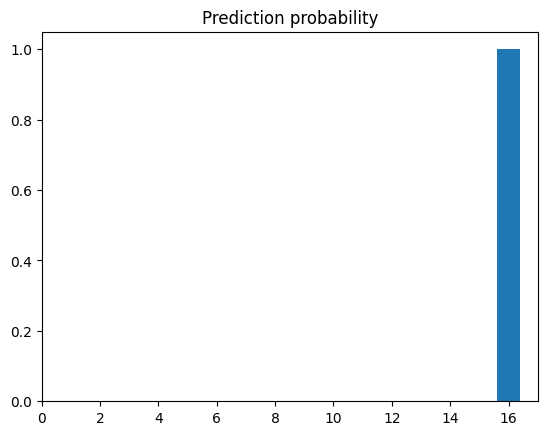

In [464]:
idx = 17
print(x_train[idx:idx+1].shape)
yhat = model.predict(x_train[idx:(idx+1)])
print(yhat)
plt.bar(np.arange(num_classes),yhat[0])
plt.xlim([0,num_classes])
plt.title('Prediction probability')
print(np.argmax(yhat))
print(unique_trueName[np.argmax(y_train[idx])])
print(unique_trueName[np.argmax(yhat)])